In [1]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os
import math
import copy
import time
import datetime
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


In [5]:
os.getcwd()

'C:\\Users\\chiaming\\Desktop\\python'

In [12]:

folder = 'bored'
file = 'urls_bored.txt'

In [16]:

folder = 'surprise'
file = 'urls_surprise.txt'

In [21]:
folder = "angry"
file = "urls_angry.txt"

In [2]:

folder = 'happy'
file = 'urls_happy.txt'

In [3]:
path = Path('data/emotion')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [18]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/boring'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/models'),
 WindowsPath('data/emotion/surprise')]

In [29]:
print(dest/file)

data\emotion\happy\urls_happy.txt


In [4]:
classes = ['bored','surprise','angry','happy']

In [23]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/boring'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/models'),
 WindowsPath('data/emotion/surprise')]

In [28]:
download_images(dest/file,dest, max_pics=500)

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bored


surprise


angry


happy


In [12]:
path

WindowsPath('data/emotion')

In [4]:
df = pd.read_csv(path/'labels.csv')
df.tail()

,emotion,Usage,pixels
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886,2,PrivateTest,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...


In [22]:
df.iloc[:,0].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [20]:
df_train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [21]:
np.where(df.iloc[:,1]=="Training")[0]

array([    0,     1,     2,     3, ..., 28705, 28706, 28707, 28708], dtype=int64)

In [5]:
df_train = df.iloc[np.where(df.iloc[:,1]=="Training")[0]]
df_val = df.iloc[np.where(df.iloc[:,1]=="PrivateTest")[0]]
df_test = df.iloc[np.where(df.iloc[:,1]=="PublicTest")[0]]

In [6]:
df_train = df_train.drop(' Usage',axis=1)
df_val = df_val.drop(' Usage',axis=1)
df_test = df_test.drop(' Usage',axis=1)

In [23]:
os.mkdir('train')
print(os.getcwd())

C:\Users\chiaming\Desktop\python


In [ ]:
data1 = ['train','val','test']
for file in data1:
    os.mkdir(file)
   # save = pd.DataFrame(np.zeros(shape=(48,48)))
   # target = globals()['df_'+file].iloc[:,1]
    for label in range(7):
        if(label in [6]):
            os.mkdir(file+'/'+str(label))
            globals()['emotion'+str(label)] = globals()['df_'+file].iloc[np.where(globals()['df_'+file].iloc[:,0]==label)[0],1].values
            for face in range(len(globals()['emotion'+str(label)])):
                face_data= np.mat(globals()['emotion'+str(label)][face].split(' '))
                face_data = np.reshape(face_data,(48,48))
                   # contain = pd.DataFrame(np.zeros(shape=(48,48)))
                   # counter = 0
               # for row in range(48):
               #     for col in range(48):
               #         contain.iloc[row,col] = face_data[counter]
               #         counter += 1
                x = face_data
                img = Image.fromarray(x.astype(np.uint8), 'L') 
                plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
                plt.savefig(file+'/'+str(label)+'/'+str(face)+'.png')
                print('【'+file+'】'+'['+str(label)+'] 共'+str(face)+'張圖片')

In [ ]:
df_train.iloc[1,1]

In [18]:
x = pd.DataFrame(np.zeros(shape=(48,48)))
da= df_train.iloc[10,1].split(' ')
counter = 0
for row in range(48):
    for col in range(48):
        x.iloc[row,col] = da[counter]
        counter += 1

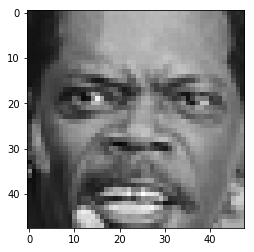

In [21]:
x = np.array(x)
img = Image.fromarray(x.astype(np.uint8), 'L') 
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.savefig('testtt.png')

In [ ]:
df_train_data = ImageDataBunch.from_csv(path,ds_tfms=df_train,size=48)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['angry', 'bored', 'happy', 'surprise']

In [ ]:
np.zeros(shape=(48,48))

In [ ]:
data.show_batch(rows=3, figsize=(20,20))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.171178,1.488292,0.446809,04:08
1,1.676255,1.383441,0.420213,04:13
2,1.420366,1.319890,0.404255,04:15


In [16]:
learn.save('stage-3')

In [ ]:
learn.load('stage-1')

In [37]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


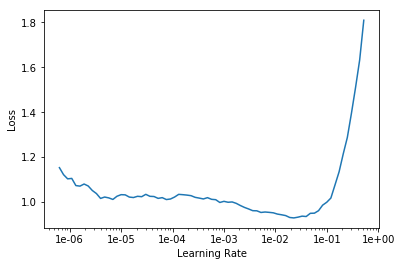

In [12]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

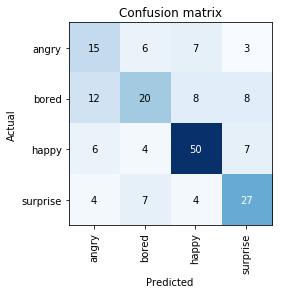

In [14]:
interp.plot_confusion_matrix()

In [29]:
print("【未清資料後的第二次準確率v1.2】")
print("憤怒:"+str(round(44/(14+44+11+22),2)*100)+"%")
print("無聊:"+(str(round(37/(20+37+14+15),2)*100))+"%")
print("開心:"+str(round(57/(8+20+57+7),2)*100)+"%")
print("驚訝:"+str(round(51/(16+22+8+51),2)*100)+"%")
print("整體:"+str(round((44+37+57+51)/(14+44+11+22+20+37+14+15+8+20+57+7+16+22+8+51),2)*100)+'%')

【未清資料後的第二次準確率v1.2】
憤怒:48.0%
無聊:43.0%
開心:62.0%
驚訝:53.0%
整體:52.0%


In [21]:
(15+20+50+27)/(15+6+7+3+12+20+8+8+6+4+50+7+4+7+4+27+15+20+50+27)

0.37333333333333335

## 第二次訓練

In [17]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.973643,1.548630,0.452128,04:26
1,1.025649,1.539528,0.430851,04:45
2,0.918453,1.392443,0.409574,04:25


In [18]:
learn.save('stage-4')

In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


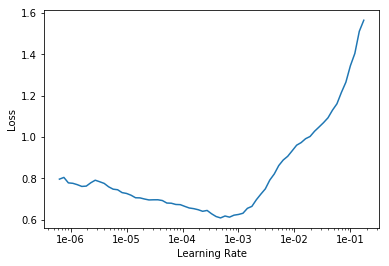

In [23]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

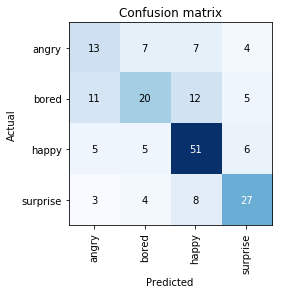

In [25]:
interp.plot_confusion_matrix()

In [67]:
print("憤怒:"+str(round(44/(44+14+11+22),2)*100)+"%")
print("無聊:"+(str(round(37/(20+37+14+15),2)*100))+"%")
print("開心:"+str(round(57/(8+20+57+7),2)*100)+"%")
print("驚訝:"+str(round(51/(16+22+8+51),2)*100)+"%")
print("整體:"+str(round((44+37+57+51)/(44+14+11+22+20+37+14+15+8+20+57+7+16+22+8+51+44+20+57+51),2)*100)+'%')

憤怒:48.0%
無聊:43.0%
開心:62.0%
驚訝:53.0%
整體:35.0%


In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


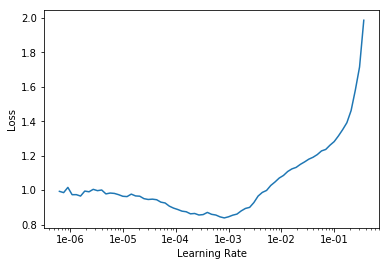

In [43]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()